<a href="https://colab.research.google.com/github/hanghae-plus-AI/AI-1-JunYear/blob/main/week%203/%5B3%EC%A3%BC%EC%B0%A8%5D_%EC%8B%AC%ED%99%94_%EA%B3%BC%EC%A0%9C_GPT%EB%A1%9C_%EB%89%B4%EC%8A%A4_%EA%B8%B0%EC%82%AC_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT로 뉴스 기사 분류 모델 학습하기
이번 과제에서는 pre-trained 된 GPT를 가지고 뉴스 기사 분류 모델을 구현합니다. GPT와 BERT의 차이점에 유의하여 과제를 수행하시면 됩니다.

In [1]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00


그 후, 우리가 사용하는 GPT pre-training 때 사용한 tokenizer를 불러옵니다.

In [2]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader

tokenizer = torch.hub.load(
    'huggingface/pytorch-transformers',
    'tokenizer',
    'openai-gpt'
)
tokenizer.pad_token = tokenizer.unk_token

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://h

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/816k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/458k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
ds = load_dataset("fancyzhx/ag_news")


def collate_fn(batch):
  max_len = 400
  texts, labels = [], []
  for row in batch:
    labels.append(row['label'])
    texts.append(row['text'])

  texts = torch.LongTensor(tokenizer(texts, padding=True).input_ids)
  labels = torch.LongTensor(labels)

  return texts, labels

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [4]:
train_loader = DataLoader(
    ds['train'], batch_size=64, shuffle=True, collate_fn=collate_fn
)

test_loader = DataLoader(
    ds['test'], batch_size=64, shuffle=False, collate_fn=collate_fn
)

In [5]:
ds['train'][0]

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'label': 2}

- “월가 공매도, 다시 흑자로 돌아서다 (로이터)” 로이터
  - 월가의 극도로 냉소적인 공매도 세력이 다시 활기를 되찾고 있습니다.”

In [6]:
ds['test'][0]

{'text': "Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.",
 'label': 2}

- “회담 후 T N 연금에 대한 두려움 터너 뉴올의 노동자들을 대표하는 노조는 타격을 입은 모기업인 연방 모굴과의 회담 후 '실망했다'고 말합니다.”

Huggingface dataset의 fancyzhx/ag_news의 클래스(카테고리) 갯수를 확인하여, 출력 차원을 조정한다.

In [7]:
label_names = ds['train'].features['label'].names

for idx, label in enumerate(label_names):
  print(f"{idx}: {label}")

0: World
1: Sports
2: Business
3: Sci/Tech


In [8]:
model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'openai-gpt')
model

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


model.safetensors:   0%|          | 0.00/479M [00:00<?, ?B/s]

OpenAIGPTModel(
  (tokens_embed): Embedding(40478, 768)
  (positions_embed): Embedding(512, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x Block(
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
  )
)

In [9]:
from torch import nn

num_label = 4

class TextClassifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = torch.hub.load('huggingface/pytorch-transformers', 'model', 'openai-gpt')
    self.classifier = nn.Linear(768, num_label)

  def forward(self, x):
    x = self.encoder(x)['last_hidden_state']
    x = self.classifier(x[:, -1, :])  # GPT 특성상 마지막 토큰의 표현이 전체 시퀀스의 정보를 반영

    return x

model = TextClassifier()

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [10]:
for param in model.encoder.parameters():
  param.requires_grad = False

In [11]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)
    # preds = (preds > 0).long()[..., 0]

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

In [12]:
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt


lr = 0.001
model = model.to('cuda')
loss_fn = nn.CrossEntropyLoss()

total_loss_list = []
train_acc_list = []
test_acc_list = []


optimizer = Adam(model.parameters(), lr=lr)
n_epochs = 10

for epoch in range(n_epochs):
  total_loss = 0.
  model.train()
  for data in train_loader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  print(f"Epoch {epoch:3d} | Train Loss: {total_loss}")

  total_loss_list.append(total_loss)

  with torch.no_grad():
    model.eval()
    train_acc = accuracy(model, train_loader)
    test_acc = accuracy(model, test_loader)
    print(f"=========> Train acc: {train_acc:.3f} | Test acc: {test_acc:.3f}")

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

Epoch   0 | Train Loss: 1326.4676902592182
=========> Train acc: 0.823 | Test acc: 0.824
Epoch   1 | Train Loss: 1113.2367295920849
=========> Train acc: 0.834 | Test acc: 0.834
Epoch   2 | Train Loss: 1089.0120390057564
=========> Train acc: 0.840 | Test acc: 0.836
Epoch   3 | Train Loss: 1068.3106598705053
=========> Train acc: 0.838 | Test acc: 0.832
Epoch   4 | Train Loss: 1073.3143560290337
=========> Train acc: 0.835 | Test acc: 0.834
Epoch   5 | Train Loss: 1065.0226341784
=========> Train acc: 0.844 | Test acc: 0.842
Epoch   6 | Train Loss: 1057.828938767314
=========> Train acc: 0.836 | Test acc: 0.832
Epoch   7 | Train Loss: 1059.1164450645447
=========> Train acc: 0.845 | Test acc: 0.841
Epoch   8 | Train Loss: 1059.3375061154366
=========> Train acc: 0.843 | Test acc: 0.838
Epoch   9 | Train Loss: 1057.7627293914557
=========> Train acc: 0.810 | Test acc: 0.808


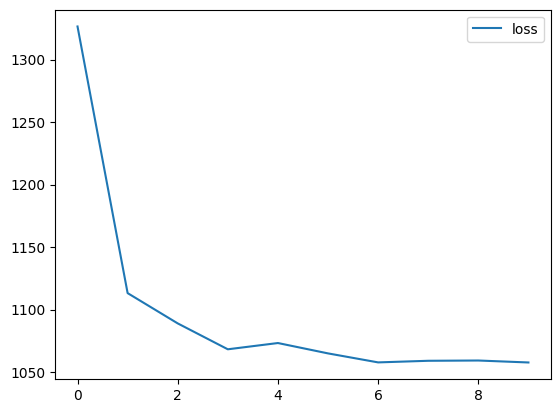

In [13]:
def plot_loss(total_loss, label1='loss'):
  x = np.arange(len(total_loss))

  plt.plot(x, total_loss, label=label1)
  plt.legend()
  plt.show()

plot_loss(total_loss_list)

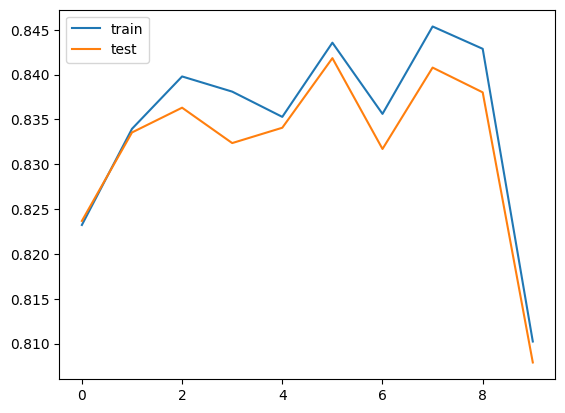

In [14]:
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

plot_acc(train_acc_list, test_acc_list)

## 해결할 문제: Warning Message
- We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.